# Sesión 3: Mapas temáticos

> 17 de Diciembre del 2025

## Import

In [12]:
import sys

sys.path.append("../src")

In [13]:
import geopandas as gpd
import pandas as pd
from geopandas.geodataframe import GeoDataFrame
import matplotlib.pyplot as plt

from config import Config

In [14]:
MONTHS = [
    "Enero",
    "Febrero",
    "Marzo",
    "Abril",
    "Mayo",
    "Junio",
    "Julio",
    "Agosto",
    "Septiembre",
    "Octubre",
    "Noviembre",
    "Diciembre",
]


class TypeOfCrime:
    HOMICIDIO_DOLOSO = "Homicidio doloso"


class Columns:
    SUBTYPE_OF_CRIME = "Subtipo de delito"
    YEAR = "Año"
    CLAVE_ENT = "Clave_Ent"
    ENTIDAD = "Entidad"
    TOTAL = "Total"

## Loading data

In [15]:
data = pd.read_csv(Config.IDFC, encoding="cp1252")
map_: GeoDataFrame = gpd.read_file(Config.MEXICO_SHAPEFILE)


data["Total"] = data[MONTHS].sum(axis=1)
data.head(5)

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,0,2,1,1,1,2,1,2,2,2.0,1.0,18.0
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,0,0,0,1,0,1,0,0,0.0,1.0,5.0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,2,2,3,2,0,1,2,0,0.0,0.0,12.0
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,2,0,0,1,0,0,0,0,0,0,0.0,0.0,3.0
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,1,0,0,0,0,0,0.0,0.0,1.0


In [16]:
map_.head(5)

,CVEGEO,CVE_ENT,NOMGEO,geometry
0,01,01,Aguascalientes,"POLYGON ((2469550.852 1159302.643, 2469738.209..."
1,02,02,Baja California,"MULTIPOLYGON (((1313480.513 1831458.607, 13135..."
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.345 1227647.637, 16946..."
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491..."
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469501.165 1978862.429, 2469539.651..."


## Filter

In [17]:
# Filtrar por delitos de homicidio doloso
data_filter = data.copy()
data_filter = data_filter[
    data_filter[Columns.SUBTYPE_OF_CRIME] == TypeOfCrime.HOMICIDIO_DOLOSO
]
data_filter.head(5)

# Agrupar por año, clave de entidad y entidad, sumando el total de homicidios dolosos
data_total_hom = data_filter.copy()
data_total_hom = (
    data_total_hom.groupby([Columns.YEAR, Columns.CLAVE_ENT, Columns.ENTIDAD])[
        Columns.TOTAL
    ]
    .sum()
    .reset_index()
)
data_total_hom.head(32)

,Año,Clave_Ent,Entidad,Total
0,2015,1,Aguascalientes,38.0
1,2015,2,Baja California,821.0
2,2015,3,Baja California Sur,151.0
3,2015,4,Campeche,49.0
4,2015,5,Coahuila de Zaragoza,278.0
5,2015,6,Colima,162.0
6,2015,7,Chiapas,502.0
7,2015,8,Chihuahua,945.0
8,2015,9,Ciudad de México,798.0
9,2015,10,Durango,236.0


In [18]:
# Verificar columnas
map_[["CVE_ENT", "NOMGEO"]].dtypes
data_total_hom[[Columns.CLAVE_ENT, Columns.ENTIDAD]].dtypes


Clave_Ent     int64
Entidad      object
dtype: object

## Reassign type

In [19]:
# Fix data type mismatch before merge
# Convert both columns to string type to ensure compatibility
map_["CVE_ENT"] = map_["CVE_ENT"].astype(str)
data_total_hom[Columns.CLAVE_ENT] = data_total_hom[Columns.CLAVE_ENT].astype(str)


In [20]:
# Filter for 2024 data
data_2024 = data_total_hom[data_total_hom[Columns.YEAR] == 2024]


In [21]:
map_ = map_.merge(
    data_total_hom[data_total_hom[Columns.YEAR] == 2024],
    left_on=["NOMGEO"],
    right_on=[Columns.ENTIDAD],
    how="left",
)


## Visualization

### Continuas

<Figure size 7500x6000 with 0 Axes>

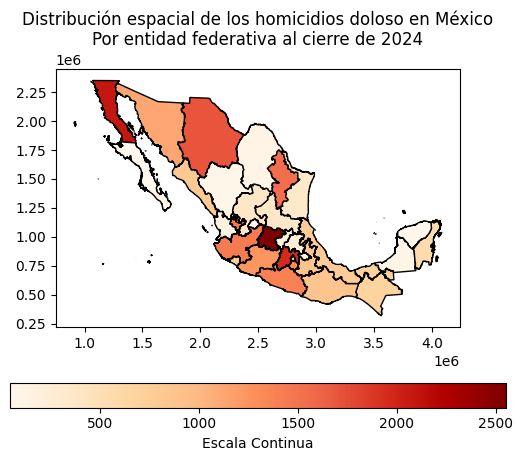

In [22]:
# Mapa temático con variable continua
plt.figure(figsize=(15, 12), dpi=500)
map_.plot(
    column="Total",
    legend=True,
    cmap="OrRd",
    legend_kwds={"label": "Escala Continua", "orientation": "horizontal"},
    edgecolor="black",
)
plt.title(
    "Distribución espacial de los homicidios doloso en México\nPor entidad federativa al cierre de 2024"
)
plt.grid(False)
plt.show()


In [23]:
map_.head(2)

,CVEGEO,CVE_ENT,NOMGEO,geometry,Año,Clave_Ent,Entidad,Total
0,01,01,Aguascalientes,"POLYGON ((2469550.852 1159302.643, 2469738.209...",2024,1,Aguascalientes,112.0
1,02,02,Baja California,"MULTIPOLYGON (((1313480.513 1831458.607, 13135...",2024,2,Baja California,2089.0


### Quantiles

<Figure size 7500x6000 with 0 Axes>

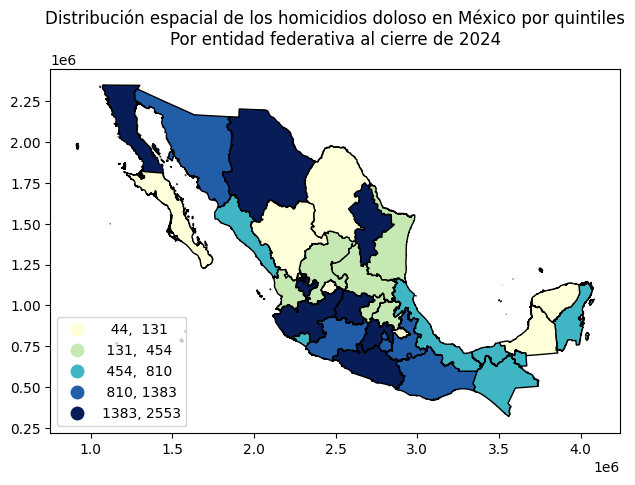

In [24]:
plt.figure(figsize=(15, 12), dpi=500)
map_.plot(
    column="Total",
    scheme="Quantiles",
    k=5,
    legend=True,
    cmap="YlGnBu",
    legend_kwds={"loc": "lower left", "fmt": "{:.0f}"},
    edgecolor="black",
)
plt.title(
    "Distribución espacial de los homicidios doloso en México por quintiles\nPor entidad federativa al cierre de 2024"
)
plt.grid(False)
plt.tight_layout()

# Sesión 4: Mapas temáticos

> 18 de Diciembre del 2025

## Visualization

<Figure size 7500x6000 with 0 Axes>

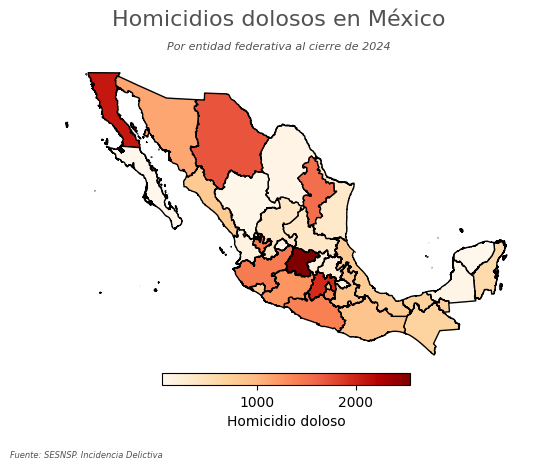

In [25]:
# Mapa temático con variable continua
plt.figure(figsize=(15, 12), dpi=500)
map_.plot(
    column="Total",
    legend=True,
    cmap="OrRd",
    legend_kwds={
        "label": TypeOfCrime.HOMICIDIO_DOLOSO,
        "orientation": "horizontal",
        "shrink": 0.5,
        "pad": 0.01,
    },
    edgecolor="black",
)
# plt.legend(prop={"size": 5})
plt.axis("off")
plt.figtext(
    0.5, 0.95, "Homicidios dolosos en México", ha="center", fontsize=16, color="#525252"
)
plt.figtext(
    0.5,
    0.90,
    "Por entidad federativa al cierre de 2024",
    ha="center",
    fontsize=8,
    color="#525252",
    style="italic",
)
plt.figtext(
    0.2,
    0.05,
    "Fuente: SESNSP. Incidencia Delictiva",
    ha="center",
    fontsize=6,
    color="#525252",
    style="italic",
)
plt.grid(False)
plt.show()

# Sesión 5: Capas

> 19 de Diciembre del 2025

## Loading Data

In [31]:
# Try reading with error handling and explicit parameters
sismos_df = pd.read_csv(
	Config.SISMO_DATA,
    skiprows=4,
    encoding="latin1",
)

/var/folders/61/hty_r__d15j4mg84f9ljmm7r0000gn/T/ipykernel_21698/568348134.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  sismos_df = pd.read_csv(


In [32]:
sismos_df.tail(10)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
327400,2025-10-12,04:26:39,3.4,18.151,-102.390,30.4,"14 km al NOROESTE de LA MIRA, MICH",2025-10-12,10:26:39,verificado
327401,2025-10-12,04:47:17,3.6,16.089,-94.526,73.9,"54 km al SURESTE de UNION HIDALGO, OAX",2025-10-12,10:47:17,verificado
327402,2025-10-12,06:24:07,4.3,18.704,-104.227,2.2,"38 km al SUROESTE de CD DE ARMERIA, COL",2025-10-12,12:24:07,verificado
327403,Fecha y hora local en tiempo del centro de Mex...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327404,La localizacion es solo una referencia a una l...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327405,Los registros con estatus verificado son los c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327406,Los registros obtienen estatus revisado cuando...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327407,Esta informacion puede ser reproducida con fin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327408,Consulta nuestro Aviso Legal y Terminos de Uso...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327409,www.ssn.unam.mx | contacto@sismologico.unam.mx...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Transform

Hay que transformar la magnitud

In [ ]:
sismos_df = sismos_df.dropna(subset=["Hora"])

In [34]:
sismos_df.tail(10)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
327393,2025-10-12,03:21:50,3.7,22.047,-99.306,5.0,"31 km al OESTE de CD VALLES, SLP",2025-10-12,09:21:50,verificado
327394,2025-10-12,03:22:49,3.6,16.893,-95.861,100.2,"66 km al ESTE de TLACOLULA, OAX",2025-10-12,09:22:49,verificado
327395,2025-10-12,03:25:15,1.5,23.012,-109.746,12.4,"7 km al SUROESTE de SAN JOSE DEL CABO, BCS",2025-10-12,09:25:15,verificado
327396,2025-10-12,03:35:42,3.2,32.282,-115.770,20.2,"43 km al SUROESTE de SANTA ISABEL, BC",2025-10-12,09:35:42,verificado
327397,2025-10-12,04:19:35,3.6,14.975,-93.167,66.2,"59 km al SUROESTE de MAPASTEPEC, CHIS",2025-10-12,10:19:35,verificado
327398,2025-10-12,04:21:04,3.1,19.410,-103.775,90.9,"16 km al NORTE de VILLA DE ALVAREZ, COL",2025-10-12,10:21:04,verificado
327399,2025-10-12,04:24:28,1.7,23.007,-109.739,12.0,"7 km al SUROESTE de SAN JOSE DEL CABO, BCS",2025-10-12,10:24:28,verificado
327400,2025-10-12,04:26:39,3.4,18.151,-102.390,30.4,"14 km al NOROESTE de LA MIRA, MICH",2025-10-12,10:26:39,verificado
327401,2025-10-12,04:47:17,3.6,16.089,-94.526,73.9,"54 km al SURESTE de UNION HIDALGO, OAX",2025-10-12,10:47:17,verificado
327402,2025-10-12,06:24:07,4.3,18.704,-104.227,2.2,"38 km al SUROESTE de CD DE ARMERIA, COL",2025-10-12,12:24:07,verificado


In [35]:
sismos_df["Magnitud"] = pd.to_numeric(sismos_df["Magnitud"], errors="coerce")

> `"EPSG:4326"`: Es el sistema de coordenadas donde se encuentra México

In [66]:
# Convertir el df a GeoDataFrame
geometry = gpd.points_from_xy(sismos_df["Longitud"], sismos_df["Latitud"])
sismos_gdf = gpd.GeoDataFrame(sismos_df, geometry=geometry, crs="4326")

In [67]:
sismos_gdf.head()

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,km_epicentro,geometry
0,2000-01-01,00:55:51,3.5,17.12,-100.57,29.0,"13 km al SURESTE de TECPAN, GRO",2000-01-01,06:55:51,revisado,13.0,POINT (-100.57 17.12)
1,2000-01-02,11:35:17,4.3,16.07,-97.35,16.0,"11 km al NORESTE de RIO GRANDE, OAX",2000-01-02,17:35:17,revisado,11.0,POINT (-97.35 16.07)
2,2000-01-02,22:32:36,3.9,16.01,-98.62,6.0,"71 km al SUROESTE de PINOTEPA NACIONAL, OAX",2000-01-03,04:32:36,revisado,71.0,POINT (-98.62 16.01)
3,2000-01-03,01:55:15,3.4,17.74,-96.88,83.0,"53 km al SURESTE de TEPELMEME, OAX",2000-01-03,07:55:15,revisado,53.0,POINT (-96.88 17.74)
4,2000-01-03,04:08:44,3.5,18.30,-94.91,15.0,"25 km al SURESTE de CATEMACO, VER",2000-01-03,10:08:44,revisado,25.0,POINT (-94.91 18.3)


Extraer la referencia de los `Kms`

In [68]:
KMS_REGEX = r"(\d+(?:\.\d+)?)\s*km"
COLUMN_REF_KMS = "Referencia de localizacion"

sismos_gdf["km_epicentro"] = (
    sismos_df[COLUMN_REF_KMS]
    .str.extract(KMS_REGEX)[0]
    .astype(float)
)

In [69]:
sismos_gdf.head()

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,km_epicentro,geometry
0,2000-01-01,00:55:51,3.5,17.12,-100.57,29.0,"13 km al SURESTE de TECPAN, GRO",2000-01-01,06:55:51,revisado,13.0,POINT (-100.57 17.12)
1,2000-01-02,11:35:17,4.3,16.07,-97.35,16.0,"11 km al NORESTE de RIO GRANDE, OAX",2000-01-02,17:35:17,revisado,11.0,POINT (-97.35 16.07)
2,2000-01-02,22:32:36,3.9,16.01,-98.62,6.0,"71 km al SUROESTE de PINOTEPA NACIONAL, OAX",2000-01-03,04:32:36,revisado,71.0,POINT (-98.62 16.01)
3,2000-01-03,01:55:15,3.4,17.74,-96.88,83.0,"53 km al SURESTE de TEPELMEME, OAX",2000-01-03,07:55:15,revisado,53.0,POINT (-96.88 17.74)
4,2000-01-03,04:08:44,3.5,18.30,-94.91,15.0,"25 km al SURESTE de CATEMACO, VER",2000-01-03,10:08:44,revisado,25.0,POINT (-94.91 18.3)


## Filtro para el mapa

Sismos de magnitud 5.5 en adelante y menores a 200 kms de epicentro

In [70]:
sismos_gdf_ct = sismos_gdf[
    (sismos_gdf["Magnitud"] >= 5.5) & (sismos_gdf["km_epicentro"] <= 200)
].copy()

In [71]:
sismos_gdf_ct.head()

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,km_epicentro,geometry
206,2000-03-12,16:21:32,5.9,14.59,-92.97,35.0,"81 km al SUROESTE de HUIXTLA, CHIS",2000-03-12,22:21:32,revisado,81.0,POINT (-92.97 14.59)
624,2000-07-21,01:13:39,6.0,18.09,-98.97,48.0,"45 km al SUROESTE de CHIAUTLA DE TAPIA, PUE",2000-07-21,06:13:39,revisado,45.0,POINT (-98.97 18.09)
682,2000-08-09,06:41:47,7.0,17.99,-102.66,16.0,"35 km al OESTE de LA MIRA, MICH",2000-08-09,11:41:47,revisado,35.0,POINT (-102.66 17.99)
876,2000-10-17,15:00:41,5.8,15.38,-92.51,168.0,"27 km al NORTE de HUIXTLA, CHIS",2000-10-17,20:00:41,revisado,27.0,POINT (-92.51 15.38)
970,2000-12-03,22:42:11,6.0,14.27,-94.09,7.0,"183 km al SUROESTE de MAPASTEPEC, CHIS",2000-12-04,04:42:11,revisado,183.0,POINT (-94.09 14.27)


## Map

### Calcular quintiles

In [72]:
qt = sismos_gdf_ct["Magnitud"].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values

In [73]:
# 2. Crear variable categórica 

sismos_gdf_ct['Magnitud_qt'] = pd.cut(
    sismos_gdf_ct['Magnitud'],
    bins = qt,
    include_lowest=True
)


In [74]:
# 3. Generaer etiquetas 
labels = [f"{qt[i]:.1f} - {qt[i+1]:.1f}" for i in range(5)]

In [75]:
labels

['5.5 - 5.6', '5.6 - 5.7', '5.7 - 5.9', '5.9 - 6.2', '6.2 - 8.2']

In [76]:
# 4. Tamaños de puntos por quintil 

size_map = dict(zip(
    sismos_gdf_ct['Magnitud_qt'].cat.categories,
    [20, 40, 60, 80, 100]
))

In [77]:
sismos_gdf_ct["size"] = sismos_gdf_ct["Magnitud_qt"].map(size_map)

sismos_gdf_ct.head(2)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,km_epicentro,geometry,Magnitud_qt,size
206,2000-03-12,16:21:32,5.9,14.59,-92.97,35.0,"81 km al SUROESTE de HUIXTLA, CHIS",2000-03-12,22:21:32,revisado,81.0,POINT (-92.97 14.59),"(5.88, 6.2]",80
624,2000-07-21,01:13:39,6.0,18.09,-98.97,48.0,"45 km al SUROESTE de CHIAUTLA DE TAPIA, PUE",2000-07-21,06:13:39,revisado,45.0,POINT (-98.97 18.09),"(5.88, 6.2]",80


In [79]:
sismos_gdf_ct = sismos_gdf_ct.to_crs(map_.crs)

### Final Map

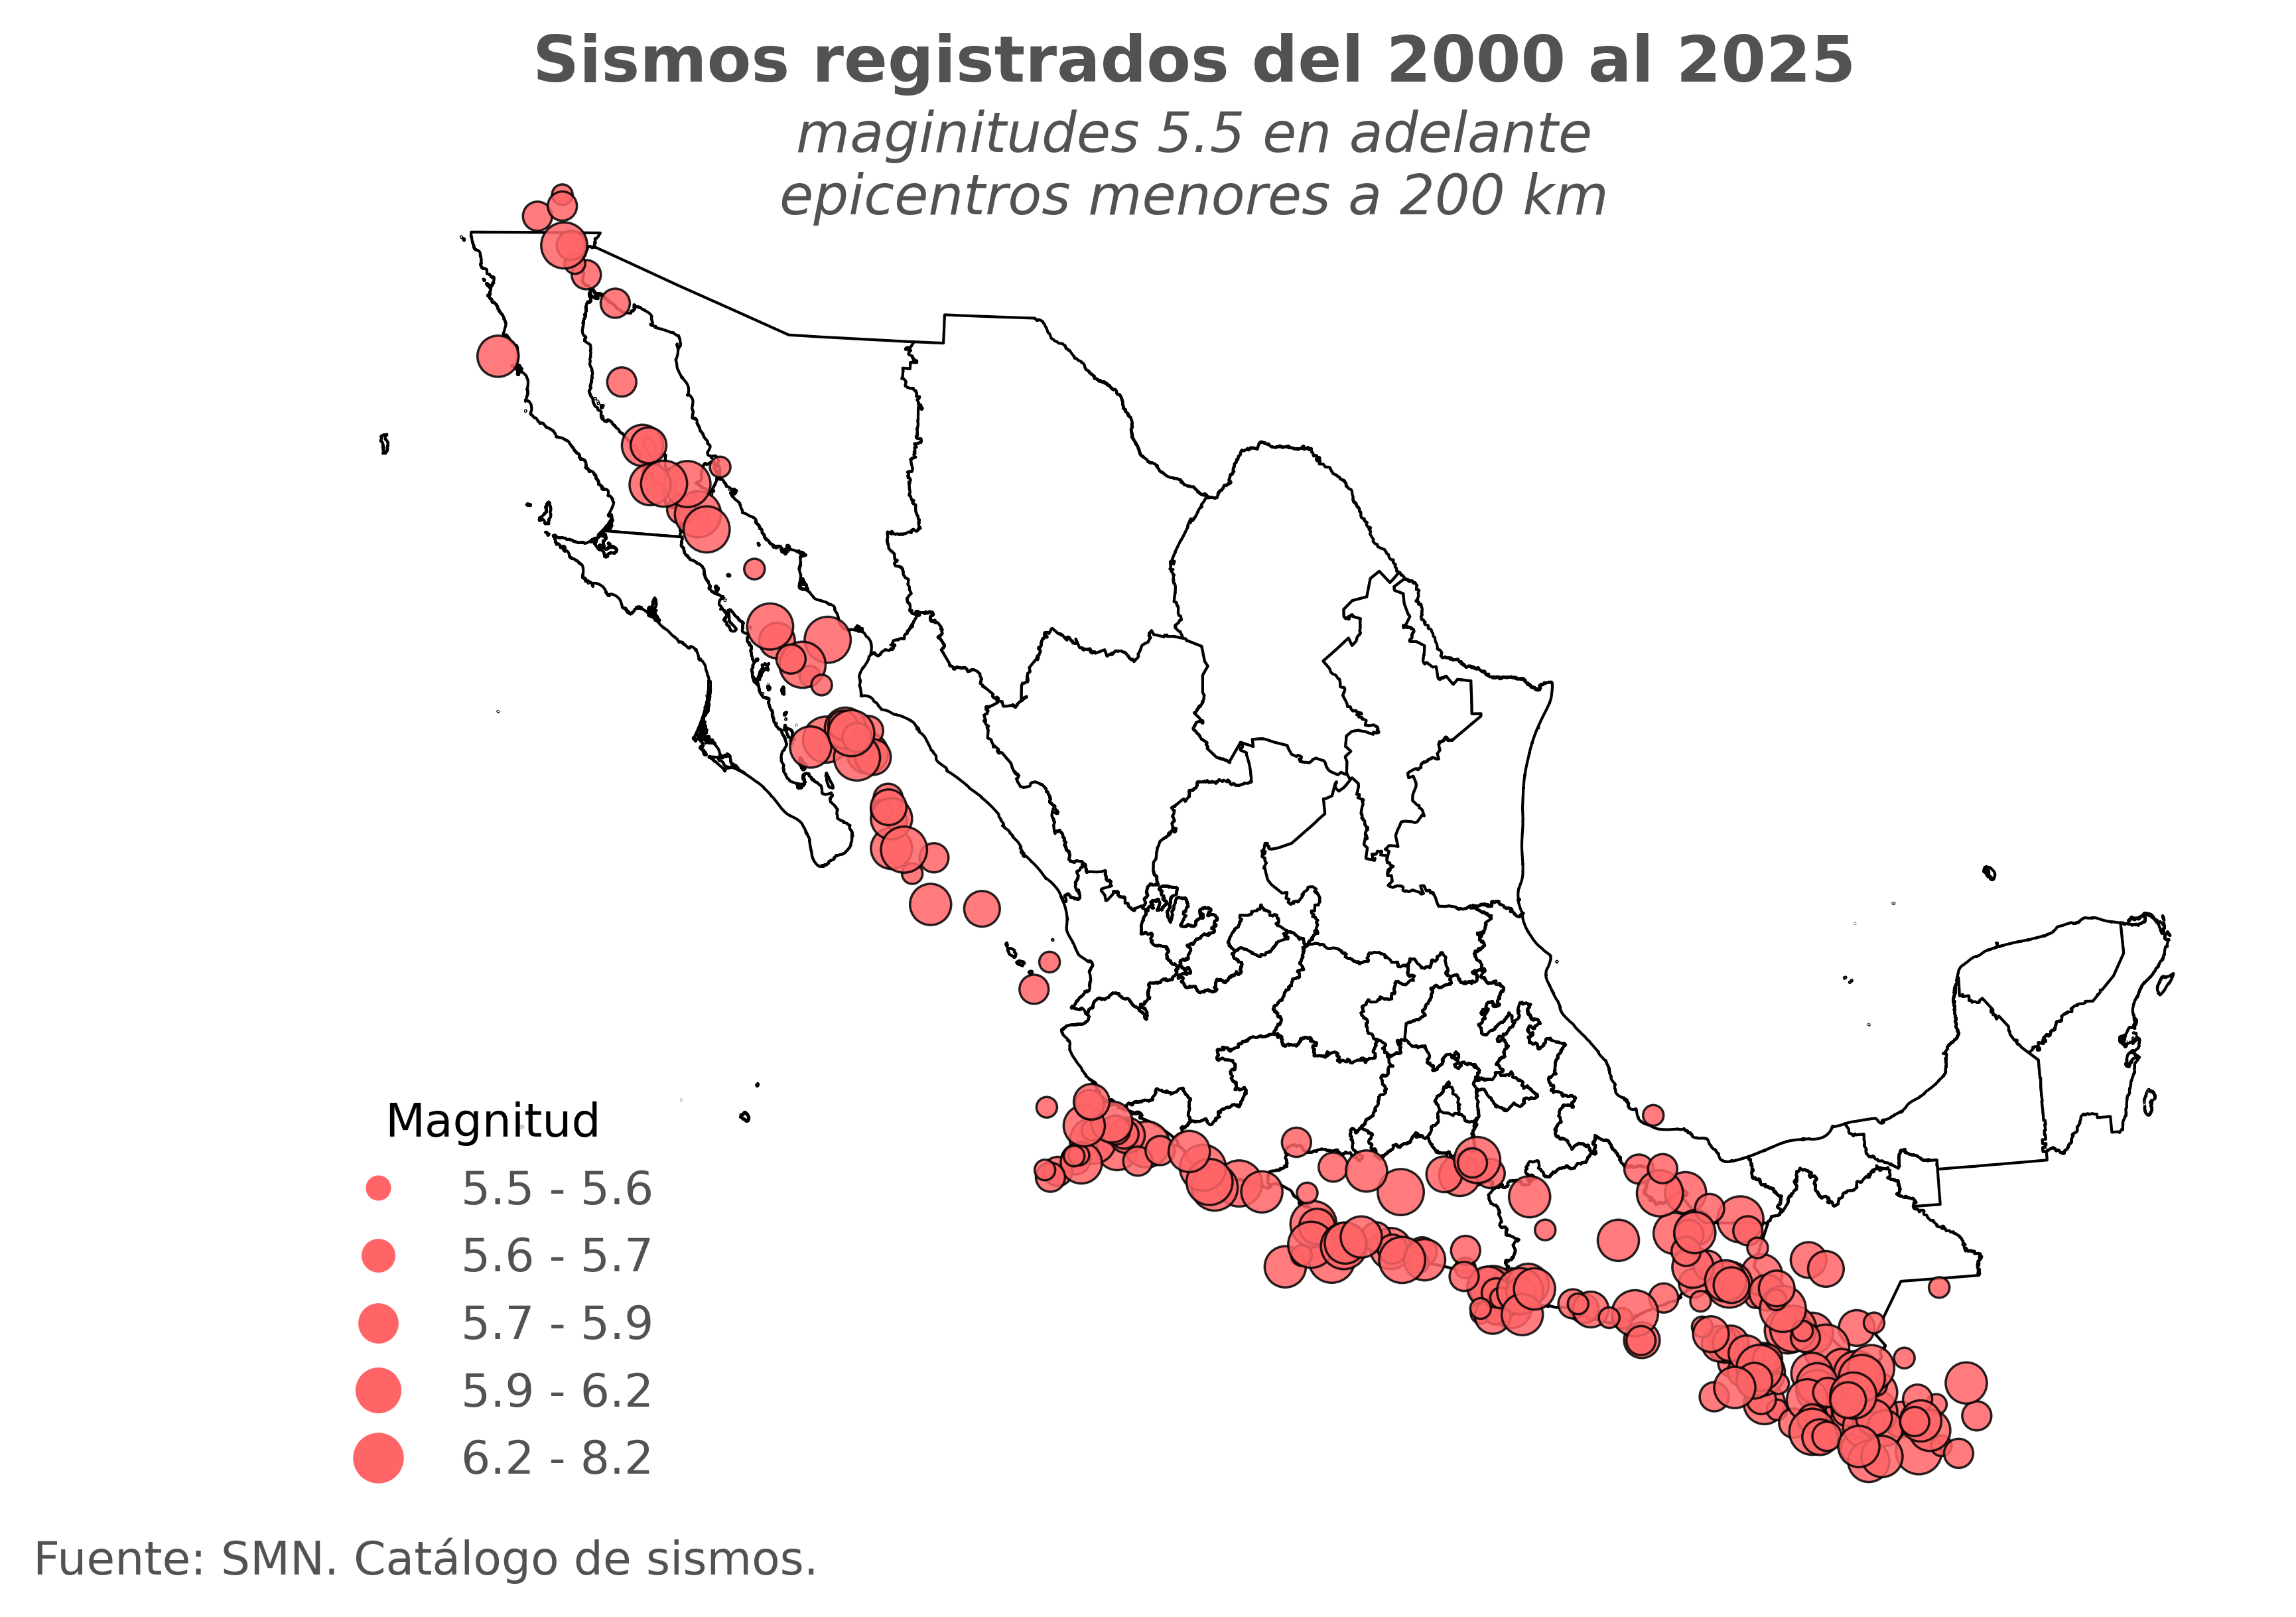

In [80]:
from matplotlib.lines import Line2D
import numpy as np

fig, ax = plt.subplots(figsize=(10, 5), dpi=500)
# Capa de la cartografía por división política (estatal)
map_.plot(ax=ax, color="white", edgecolor="black", linewidth=0.6)
# Capa de sismos
sismos_gdf_ct.plot(
    ax=ax,
    markersize=sismos_gdf_ct["size"],
    color="#FF6467",
    edgecolor="black",
    linewidth=0.5,
    alpha=0.85,
)
handles = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="#FF6467",
        label=lab,
        markersize=np.sqrt(size),
        linestyle="None",
    )
    for lab, size in zip(labels, [20, 40, 60, 80, 100])
]
ax.legend(handles=handles, title="Magnitud", loc="lower left", frameon=True)
plt.figtext(
    0.4,
    0.95,
    "Sismos registrados del 2000 al 2025",
    fontweight="bold",
    color="#525252",
    ha="center",
    fontsize=14,
)  # Titulo
plt.figtext(
    0.4,
    0.87,
    "maginitudes 5.5 en adelante\nepicentros menores a 200 km",
    style="italic",
    color="#525252",
    ha="center",
    fontsize=12,
)  # Subtitulo
plt.figtext(
    0.05, 0.05, "Fuente: SMN. Catálogo de sismos.", color="#525252", fontsize=10
)  # Pie de gráfico
ax.set_axis_off()
ax = plt.gca()
leg = ax.get_legend()

for text in leg.get_texts():
    text.set_color("#525252")

if leg is not None:
    leg.get_frame().set_linewidth(0)
    leg.get_frame().set_edgecolor("none")

plt.grid(False)
plt.tight_layout(rect=[0, 0.05, 0.85, 0.95])
# ruta_guardado = "/content/drive/MyDrive/SciData/GEOAES_25/Salidas/Mapa2_final.png"
# plt.savefig(ruta_guardado, dpi=500, bbox_inches="tight", facecolor="white")
